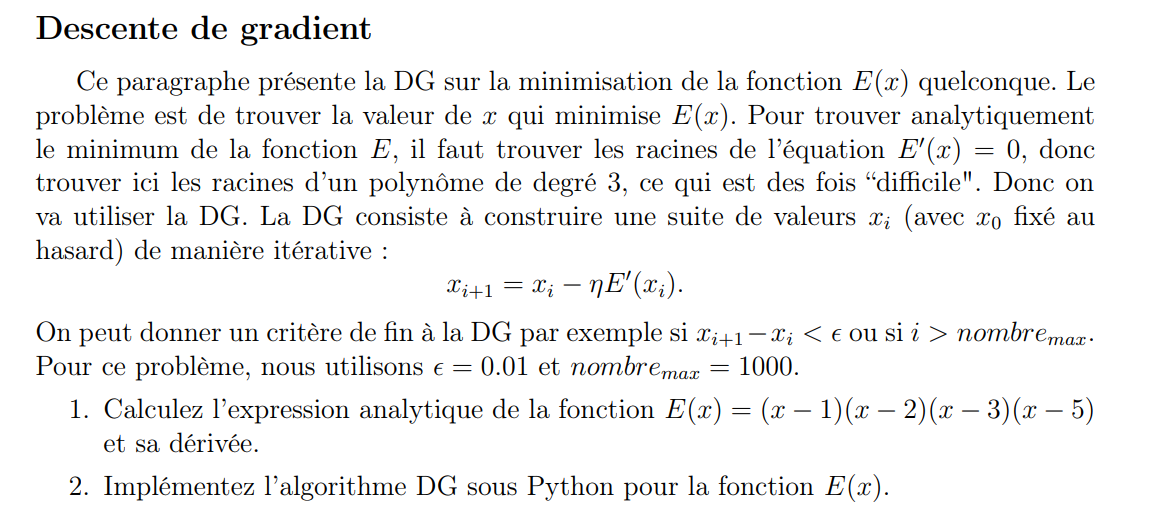

In [9]:
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def E(x):
    return (x-1)*(x-2)*(x-3)*(x-5)

def E_prime(x):
    return misc.derivative(E,x)

def Gradiant_Descent(epsilon,nombremax,η,x0):
    v=[]
    c=0
    for i in range(0,nombremax):
        c+=1
        X=x0 - η*E_prime(x0)
        if abs(X-x0) < epsilon:
            v.append((X,c))
            return v
        x0=X
        
    v.append((X,c))
    return v

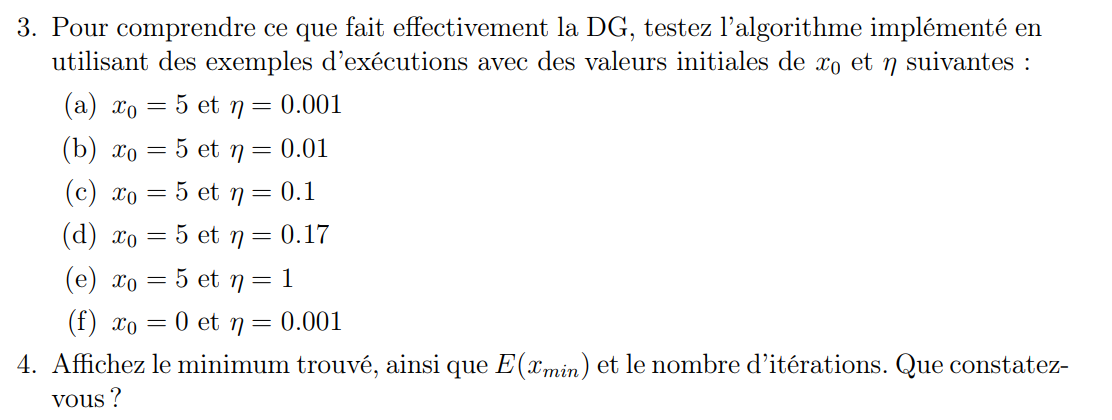

In [10]:
params=[(5, 0.001),(5,0.01),(5,0.1),(5,0.17),(5,1),(0,0.001)]

for X0 ,nu in params:
    start_time = time.time()
    
    a=Gradiant_Descent(0.01,1000,nu,X0)
    print("le nbrs d'iterations :", a[0][1])
    print("le X minim est", a[0][0])
    print("le E(Xmin) est", E(a[0][0]))
    
    print("--- %s seconds ---" % (time.time() - start_time))
    print("________________________________________")

le nbrs d'iterations : 31
le X minim est 4.441918519633145
le E(Xmin) est -6.763478042464527
--- 0.0030655860900878906 seconds ---
________________________________________
le nbrs d'iterations : 14
le X minim est 4.051313739254914
le E(Xmin) est -6.2427206928860475
--- 0.0009987354278564453 seconds ---
________________________________________
le nbrs d'iterations : 7
le X minim est 1.970713096889272
le E(Xmin) est -0.0886423362134923
--- 0.0009968280792236328 seconds ---
________________________________________
le nbrs d'iterations : 6
le X minim est -8.865122344402025e+32
le E(Xmin) est 6.17645005755892e+131
--- 0.000997781753540039 seconds ---
________________________________________
le nbrs d'iterations : 5
le X minim est 1.0047823756649958e+48
le E(Xmin) est 1.0192671673981714e+192
--- 0.001027822494506836 seconds ---
________________________________________
le nbrs d'iterations : 46
le X minim est 1.1895558059642402
le E(Xmin) est -1.0597927750528027
--- 0.0038008689880371094 seco

# ce que on remarque que lorsque le pas est mimnimal la fonction converge bien mais le temps de calcule augmente

In [7]:
def Gradiant_Descent2_with_plot(epsilon,nombremax,η,x0,number):
    c=0
    
    for i in range(0,nombremax):
        c+=1
        X=x0 - η*E_prime(x0)
        newaxis[number-1].scatter([i],[E(X)])
        newaxis[number-1].set_xlabel("Iterations", fontsize=12)
        newaxis[number-1].set_ylabel("X_min", fontsize=12)
        newaxis[number-1].set_title(f"- Plot - {number}", fontsize=12)
        
        if abs(X-x0) < epsilon:
            break
        x0=X
        

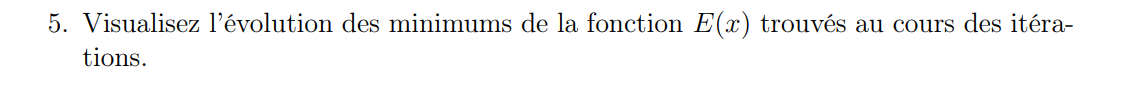

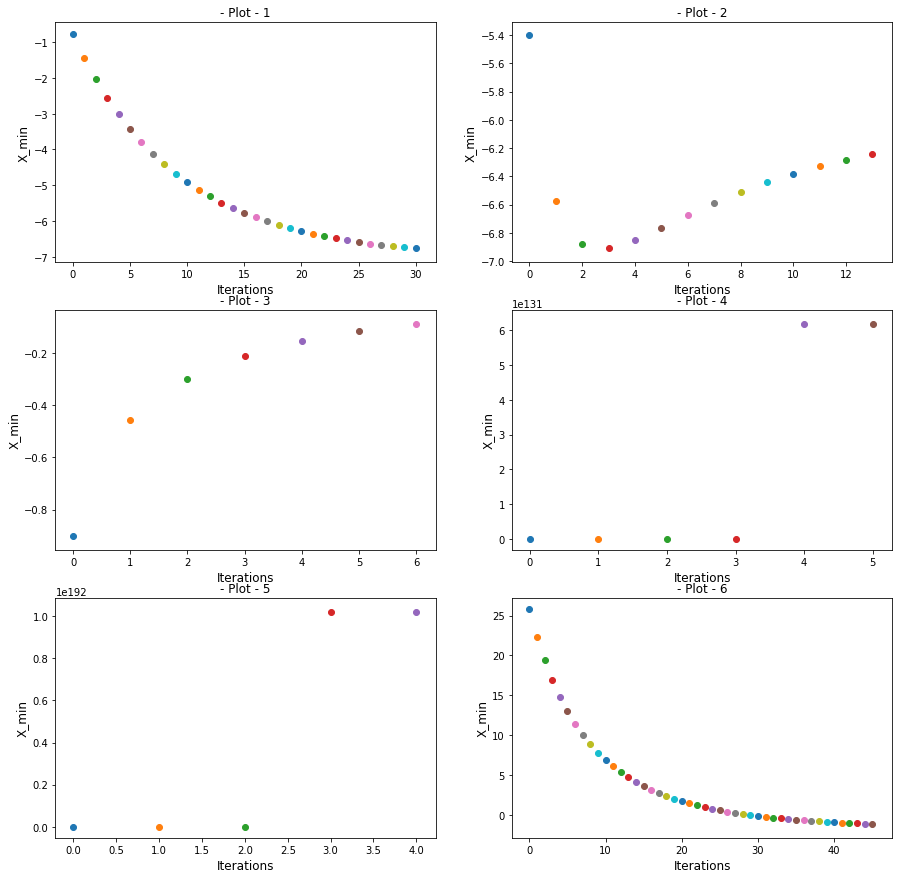

In [8]:
params=[(5, 0.001),(5,0.01),(5,0.1),(5,0.17),(5,1),(0,0.001)]
i=0
fig,axis=plt.subplots(3,2,figsize=(15,15))
newaxis=axis.reshape(6,)
    
for x0 ,η in params:
    i+=1
    Gradiant_Descent2_with_plot(0.01,1000,η,x0,i) 

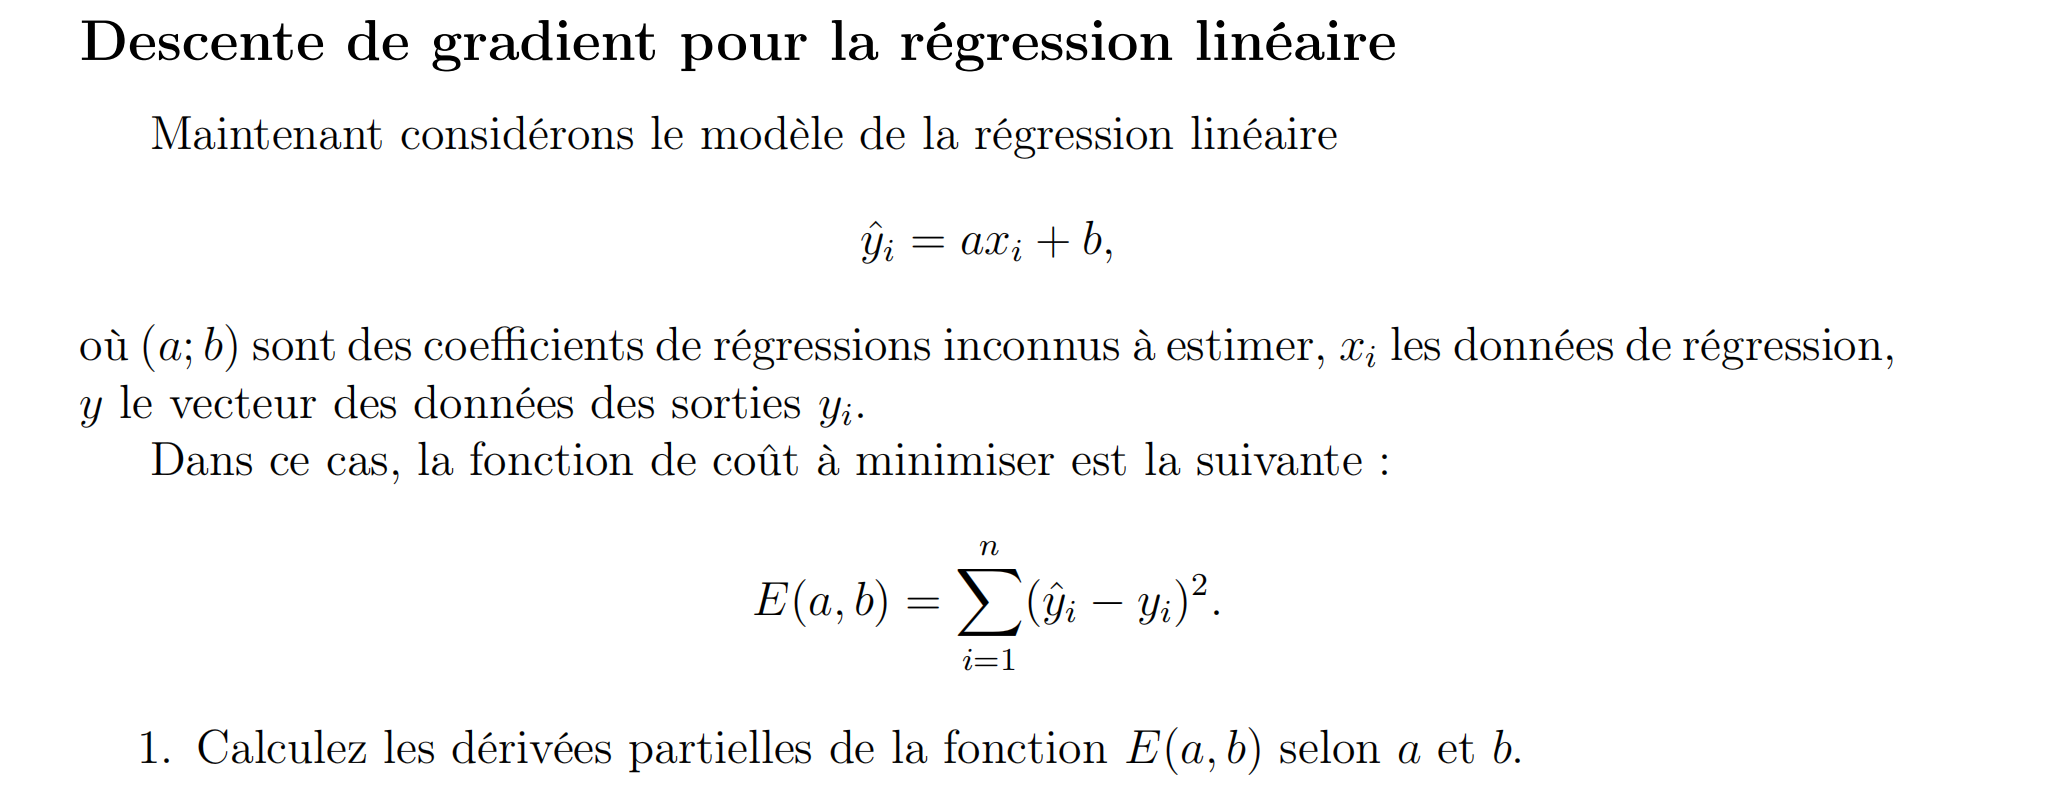

In [209]:
def der_selon_a(x,y,a,b):
    return 2 * x * (a * x + b - y)

def der_selon_b(x,y,a,b):
    return 2 * (a * x + b - y)

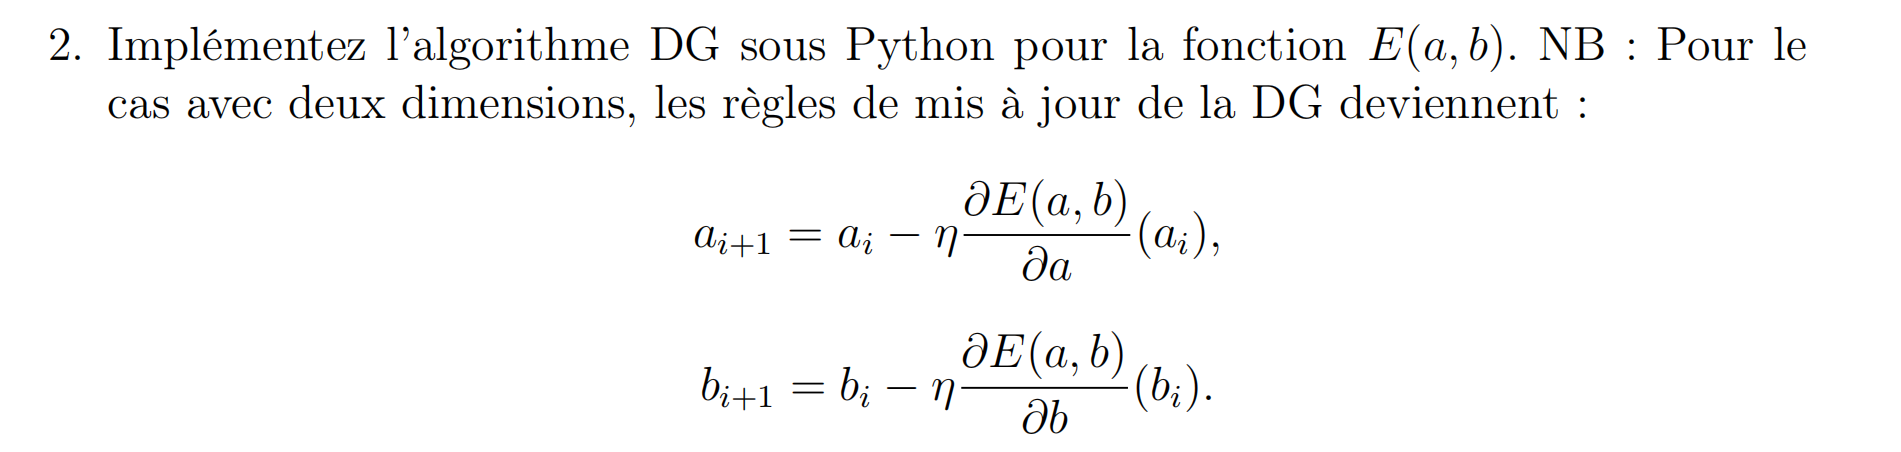

In [211]:
def DG(pas ,nombre_max ,x ,y ,eps = 0.0001):
    
    a0 = np.random.random(x.shape[1])[0]
    b0 = np.random.random(x.shape[1])[0]
    
    E = sum( [ (a0*x[j]+b0-y[j])**2 for j in range(len(x))] )
    
    for i in range(nombre_max):
        
        ai_1 = a0 - pas * sum( [ der_selon_a(x[elem] , y[elem], a0 , b0)   for elem in range(len(x)) ] )
        bi_1 = b0 - pas * sum( [ der_selon_b(x[elem] , y[elem], a0 , b0)   for elem in range(len(x)) ] )
        
        a0 = ai_1
        b0 = bi_1
        
        err = sum ( [ (a0*x[j]+b0-y[j])**2 for j in range(len(x))] )
        
        if abs(E - err) <= eps:
            return a0 ,b0 ,i, err
            break
        
    return a0 , b0 , i , err

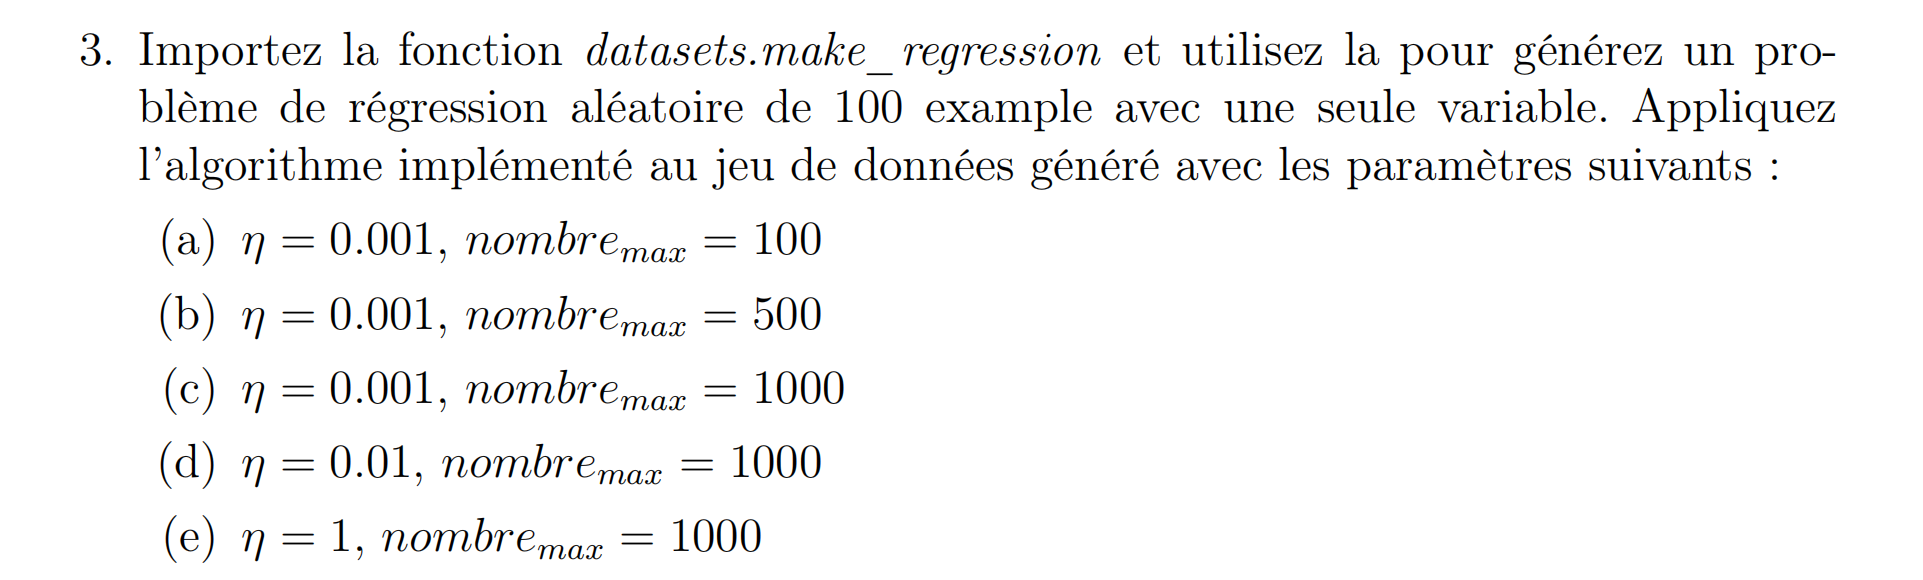

In [129]:
from sklearn.datasets import make_regression

In [147]:
x, y = make_regression(random_state=0 , n_features = 1)

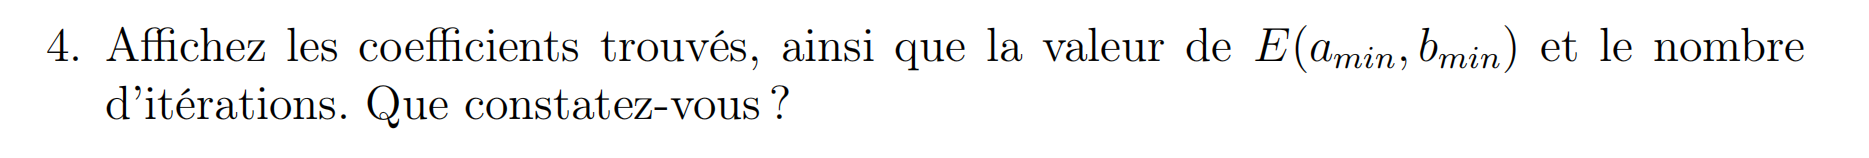

In [212]:
params=[(0.001, 100),(0.001, 500),(0.001, 1000),(0.01, 1000),(1, 1000)]

for pas ,iters in params:
    aa ,bb , iterreturned , err =  DG(pas ,iters ,x ,y)
    print("le nbrs d'iterations :", iterreturned+1)
    print(f"les coefficients trouvés : a_min = {aa}, b_min = {bb} ")
    print(" E( a_min , b_min ) : ", err )
    print("________________________________________")

le nbrs d'iterations : 100
les coefficients trouvés : a_min = [42.38550484], b_min = [1.43328812e-08] 
 E( a_min , b_min ) :  [3.71050516e-14]
________________________________________
le nbrs d'iterations : 500
les coefficients trouvés : a_min = [42.38550486], b_min = [1.74746369e-15] 
 E( a_min , b_min ) :  [2.09806432e-26]
________________________________________
le nbrs d'iterations : 1000
les coefficients trouvés : a_min = [42.38550486], b_min = [1.66554163e-15] 
 E( a_min , b_min ) :  [2.09804738e-26]
________________________________________
le nbrs d'iterations : 1000
les coefficients trouvés : a_min = [-3.21706342e+58], b_min = [-2.73725673e+58] 
 E( a_min , b_min ) :  [1.90962193e+119]
________________________________________


C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in add
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in add
  # This is added back by InteractiveShellApp.init_path()
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in add
  app.launch_new_instance()
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in add
  
C:\Users\PC\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in add
  """


le nbrs d'iterations : 1000
les coefficients trouvés : a_min = [nan], b_min = [nan] 
 E( a_min , b_min ) :  [nan]
________________________________________


NB:On constate dés que le pas est petit la fonction de cout est minimiser

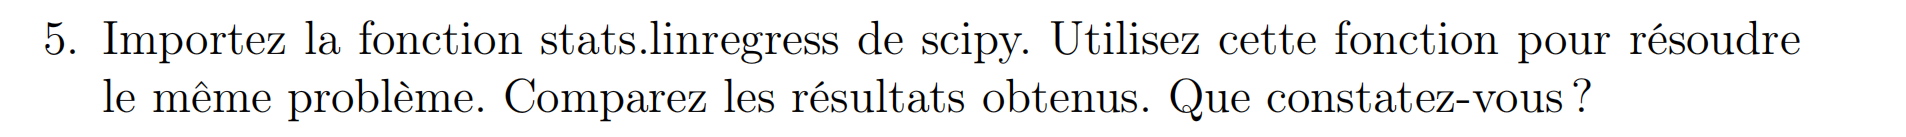

In [144]:
from scipy.stats import linregress

In [213]:
mkreg = []
for elem in x:
    mkreg.append(elem.item())

In [214]:
slope, intercept, r_value, p_value, std_err = stats.linregress(mkreg, y)

In [215]:
std_err

1.2760110372970883e-07

In [216]:
slope

42.385504855817956

In [217]:
intercept

2.220446049250313e-15

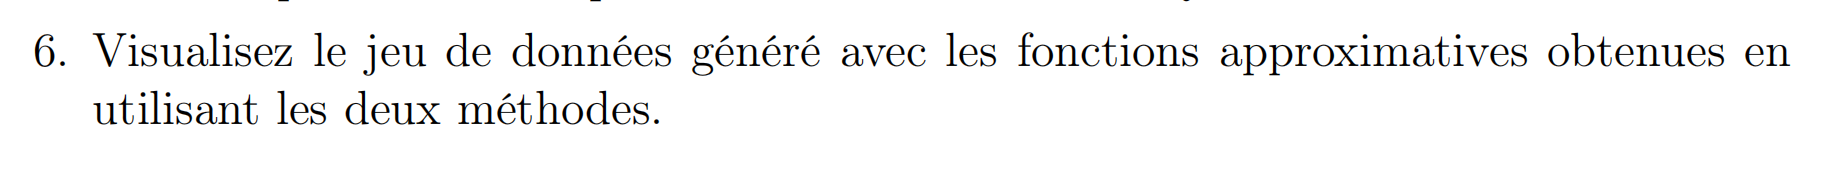

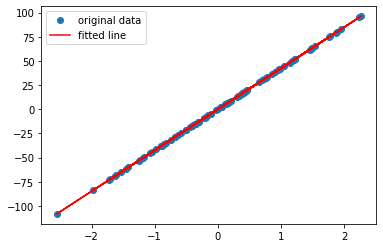

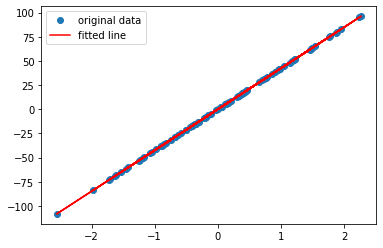

In [223]:
#obtenu par la methode linregress DG
plt.plot(x, y, 'o', label='original data')
plt.plot(x,  1.74746369e-15 + 42.38550486*x, 'r', label='fitted line')
plt.legend()
plt.show()

#obtenu par la methode linregress
plt.figure()
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()